In [1]:
import xport
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_loc = '../nhanes_data_files/'
df_CBC_J = pd.read_sas(file_loc +'CBC_J_2017_2018.xpt')
df_FOLATE_J = pd.read_sas(file_loc +'FOLATE_J_2017_2018.xpt')
df_FERTIN_J = pd.read_sas(file_loc +'FERTIN_J_2017_2018.xpt')
df_FETIB_J = pd.read_sas(file_loc +'FETIB_J_2017_2018.xpt')
df_FOLFMS_J = pd.read_sas(file_loc +'FOLFMS_J_2017_2018.xpt')
df_BIOPRO_J = pd.read_sas(file_loc +'BIOPRO_J_2017_2018.xpt')
df_BPX_J = pd.read_sas(file_loc +'BPX_J_2017_2018.xpt')
# FOLFMS_J_2017_2018.XPT
# FETIB_J_2017_2018.XPT
# FERTIN_J_2017_2018
# FOLATE_J_2017_2018

In [3]:
df_RXQ_RX_J = pd.read_sas(file_loc +'RXQ_RX_J_2017_2018.xpt')

In [4]:
df_CBC_J.columns

Index(['SEQN', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT',
       'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO',
       'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC',
       'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXNRBC'],
      dtype='object')

In [5]:
df_FOLATE_J.columns

Index(['SEQN', 'WTFOL2YR', 'LBDRFO', 'LBDRFOSI'], dtype='object')

In [6]:
df_FERTIN_J.columns

Index(['SEQN', 'LBXFER', 'LBDFERSI'], dtype='object')

In [7]:
df_FETIB_J.columns

Index(['SEQN', 'LBXIRN', 'LBDIRNSI', 'LBXUIB', 'LBDUIBLC', 'LBDUIBSI',
       'LBDTIB', 'LBDTIBSI', 'LBDPCT'],
      dtype='object')

In [8]:
df_FOLFMS_J.columns

Index(['SEQN', 'WTFOL2YR', 'LBDFOTSI', 'LBDFOT', 'LBXSF1SI', 'LBDSF1LC',
       'LBXSF2SI', 'LBDSF2LC', 'LBXSF3SI', 'LBDSF3LC', 'LBXSF4SI', 'LBDSF4LC',
       'LBXSF5SI', 'LBDSF5LC', 'LBXSF6SI', 'LBDSF6LC'],
      dtype='object')

In [9]:
df_BIOPRO_J.columns

Index(['SEQN', 'LBXSATSI', 'LBDSATLC', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI',
       'LBXSASSI', 'LBXSC3SI', 'LBXSBU', 'LBDSBUSI', 'LBXSCLSI', 'LBXSCK',
       'LBXSCR', 'LBDSCRSI', 'LBXSGB', 'LBDSGBSI', 'LBXSGL', 'LBDSGLSI',
       'LBXSGTSI', 'LBDSGTLC', 'LBXSIR', 'LBDSIRSI', 'LBXSLDSI', 'LBXSOSSI',
       'LBXSPH', 'LBDSPHSI', 'LBXSKSI', 'LBXSNASI', 'LBXSTB', 'LBDSTBSI',
       'LBDSTBLC', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSTP',
       'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI'],
      dtype='object')

In [10]:
df_BPX_J.columns

Index(['SEQN', 'PEASCCT1', 'BPXCHR', 'BPAARM', 'BPACSZ', 'BPXPLS', 'BPXPULS',
       'BPXPTY', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPXSY2', 'BPXDI2',
       'BPAEN2', 'BPXSY3', 'BPXDI3', 'BPAEN3', 'BPXSY4', 'BPXDI4', 'BPAEN4'],
      dtype='object')

In [11]:
df_BPX_J[[]].head()

""
0
1
2
3
4


In [33]:
df_merge_J=df_CBC_J[['SEQN','LBXHGB','LBXRDW','LBXMCVSI', 'LBXMCHSI', 'LBXMC']].merge(df_FOLATE_J[['SEQN','LBDRFOSI']]).merge(df_FERTIN_J[['SEQN','LBDFERSI']]).merge(df_FETIB_J[['SEQN','LBXIRN','LBXUIB','LBDTIB', 'LBDPCT']]).merge(df_FOLFMS_J[['SEQN', 'LBDFOT', 'LBXSF1SI', 'LBXSF2SI',  'LBXSF3SI',  'LBXSF4SI','LBXSF5SI', 'LBXSF6SI'] ]).merge(df_BIOPRO_J[['SEQN','LBXSAL']]).merge(df_BPX_J[['SEQN','BPXPLS','BPXSY2','BPXDI2']])

In [34]:
df_merge_J.head(3)

,SEQN,LBXHGB,LBXRDW,LBXMCVSI,LBXMCHSI,LBXMC,LBDRFOSI,LBDFERSI,LBXIRN,LBXUIB,...,LBXSF1SI,LBXSF2SI,LBXSF3SI,LBXSF4SI,LBXSF5SI,LBXSF6SI,LBXSAL,BPXPLS,BPXSY2,BPXDI2
0,93706.0,16.3,12.2,89.7,31.1,34.7,712.0,284.0,164.0,155.0,...,38.8,0.400,0.141,0.417,0.141,0.831,4.4,82.0,114.0,70.0
1,93707.0,14.5,13.6,83.9,28.9,34.4,1440.0,49.3,91.0,340.0,...,40.2,0.511,0.141,0.307,0.141,3.620,5.2,100.0,128.0,46.0
2,93708.0,13.2,13.4,86.8,28.8,33.1,1110.0,109.0,90.0,195.0,...,87.8,1.360,0.141,1.880,0.312,1.220,3.9,68.0,138.0,78.0


In [35]:
df_merge_J['BPXPP']=df_merge_J['BPXSY2']-df_merge_J['BPXDI2']
df_merge_J['BPXPP'].describe()

count    3814.000000
mean       51.064499
std        17.491567
min        16.000000
25%        40.000000
50%        48.000000
75%        58.000000
max       174.000000
Name: BPXPP, dtype: float64

<AxesSubplot:>

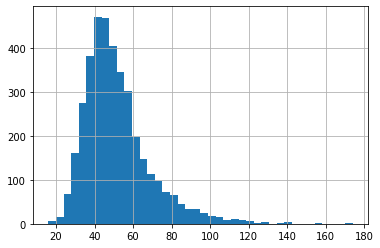

In [15]:
df_merge_J['BPXPP'].hist(bins=40)

In [16]:
df_merge_J['BPXPP'].hist

<bound method hist_series of 0       44.0
1       82.0
2       60.0
3       52.0
4       26.0
        ... 
4095    20.0
4096    42.0
4097    46.0
4098    54.0
4099    54.0
Name: BPXPP, Length: 4100, dtype: float64>

In [36]:
df_merge_J[['LBDFERSI','LBXIRN','LBXUIB','LBDTIB', 'LBDPCT','LBDRFOSI','LBDFOT','LBXSAL','BPXPLS','BPXSY2','BPXDI2','BPXPP','LBXHGB','LBXRDW','LBXMCVSI', 'LBXMCHSI', 'LBXMC']].corr()

,LBDFERSI,LBXIRN,LBXUIB,LBDTIB,LBDPCT,LBDRFOSI,LBDFOT,LBXSAL,BPXPLS,BPXSY2,BPXDI2,BPXPP,LBXHGB,LBXRDW,LBXMCVSI,LBXMCHSI,LBXMC
LBDFERSI,1.000000,0.224434,-0.420069,-0.385327,0.340006,0.088851,0.011527,0.021880,-0.053485,0.233516,0.136889,0.154855,0.242783,-0.087037,0.208751,0.214380,0.136088
LBXIRN,0.224434,1.000000,-0.612079,-0.094547,0.932547,-0.021504,0.094145,0.230620,-0.067022,0.009342,0.066435,-0.038709,0.425547,-0.351980,0.355408,0.386549,0.310667
LBXUIB,-0.420069,-0.612079,1.000000,0.849395,-0.813358,0.020227,-0.031002,-0.093669,0.187315,-0.111924,-0.104018,-0.046355,-0.417283,0.397089,-0.455538,-0.475590,-0.342235
LBDTIB,-0.385327,-0.094547,0.849395,1.000000,-0.399093,0.010618,0.024398,0.039087,0.190473,-0.135630,-0.086224,-0.085533,-0.236738,0.261347,-0.333193,-0.337395,-0.221010
LBDPCT,0.340006,0.932547,-0.813358,-0.399093,1.000000,-0.012710,0.077910,0.182330,-0.131526,0.059076,0.091636,-0.002590,0.437298,-0.366330,0.411586,0.437436,0.324348
LBDRFOSI,0.088851,-0.021504,0.020227,0.010618,-0.012710,1.000000,0.613817,-0.068419,0.009279,0.157581,0.014102,0.162897,-0.042778,0.047325,0.047114,0.056111,0.046932
LBDFOT,0.011527,0.094145,-0.031002,0.024398,0.077910,0.613817,1.000000,0.067896,0.008303,0.035874,-0.107120,0.118559,-0.018056,-0.052151,0.086810,0.085091,0.048606
LBXSAL,0.021880,0.230620,-0.093669,0.039087,0.182330,-0.068419,0.067896,1.000000,0.022447,-0.121086,-0.029102,-0.111612,0.366599,-0.283489,0.053429,0.114514,0.236556
BPXPLS,-0.053485,-0.067022,0.187315,0.190473,-0.131526,0.009279,0.008303,0.022447,1.000000,-0.131912,0.019848,-0.160967,-0.032800,0.046048,-0.127124,-0.111552,-0.022311
BPXSY2,0.233516,0.009342,-0.111924,-0.135630,0.059076,0.157581,0.035874,-0.121086,-0.131912,1.000000,0.474368,0.754161,0.070900,0.117552,0.083498,0.051325,-0.061170


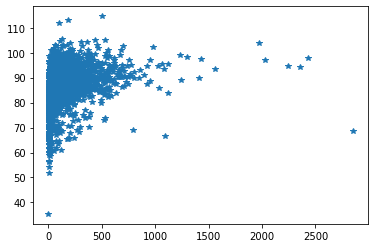

In [18]:
plt.plot(df_merge_J['LBDFERSI'],df_merge_J['LBXMCVSI'],'*')

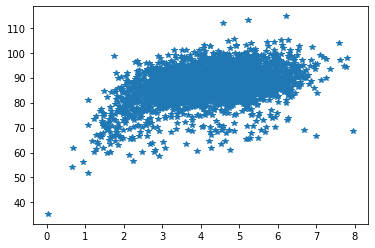

In [19]:
plt.plot(np.log(df_merge_J['LBDFERSI']),df_merge_J['LBXMCVSI'],'*')

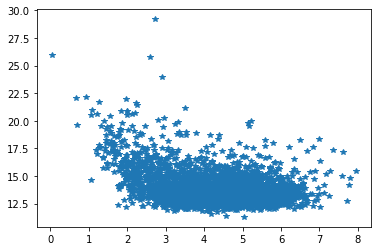

In [20]:
plt.plot(np.log(df_merge_J['LBDFERSI']),df_merge_J['LBXRDW'],'*')

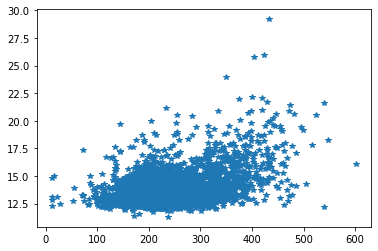

In [21]:
plt.plot(df_merge_J['LBXUIB'],df_merge_J['LBXRDW'],'*')

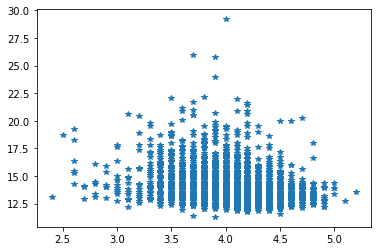

In [22]:
plt.plot(df_merge_J['LBXSAL'],df_merge_J['LBXRDW'],'*')

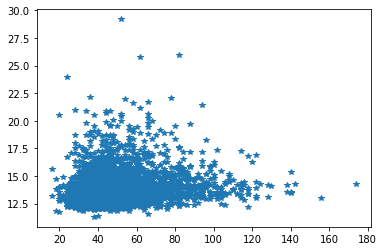

In [23]:
plt.plot(df_merge_J['BPXPP'],df_merge_J['LBXRDW'],'*')

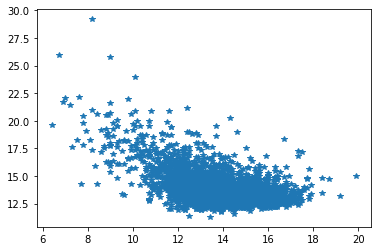

In [39]:
plt.plot(df_merge_J['LBXHGB'],df_merge_J['LBXRDW'],'*')

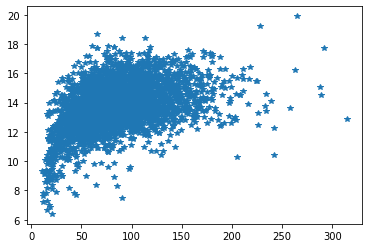

In [40]:
plt.plot(df_merge_J['LBXIRN'],df_merge_J['LBXHGB'],'*')

In [24]:
# ['SEQN', 'LBDFOT', 'LBXSF1SI', 'LBXSF2SI',  'LBXSF3SI',  'LBXSF4SI','LBXSF5SI', 'LBXSF6SI'] 

In [25]:
df_merge_J.columns

Index(['SEQN', 'LBXRDW', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBDRFOSI',
       'LBDFERSI', 'LBXIRN', 'LBXUIB', 'LBDTIB', 'LBDPCT', 'LBDFOT',
       'LBXSF1SI', 'LBXSF2SI', 'LBXSF3SI', 'LBXSF4SI', 'LBXSF5SI', 'LBXSF6SI',
       'LBXSAL', 'BPXPLS', 'BPXSY2', 'BPXDI2', 'BPXPP'],
      dtype='object')

In [32]:
df_merge_J[['LBDFOT','LBXSF1SI', 'LBXSF2SI', 'LBXSF3SI', 'LBXSF4SI', 'LBXSF5SI', 'LBXSF6SI','LBXHGB','LBXRDW','LBXMCVSI', 'LBXMCHSI', 'LBXMC']].corr()

KeyError: "['LBXHGB'] not in index"

In [27]:
df_RXQ_RX_J.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
1,93704.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
2,93705.0,1.0,b'ENALAPRIL; HYDROCHLOROTHIAZIDE',b'd03740',1.0,5475.0,b'I10',b'',b'',b'Essential (primary) hypertension',b'',b'',3.0
3,93705.0,1.0,b'MELOXICAM',b'd04532',1.0,61.0,b'M06.9',b'',b'',"b'Rheumatoid arthritis, unspecified'",b'',b'',3.0
4,93705.0,1.0,b'OMEPRAZOLE',b'd00325',1.0,3650.0,b'R12',b'',b'',b'Heartburn',b'',b'',3.0


In [28]:

df_RXQ_RX_J[df_RXQ_RX_J['RXDRSC1']=='E78.0'].RXDDRUG.value_counts()

Series([], Name: RXDDRUG, dtype: int64)

In [29]:
df_RXQ_RX_J['RXDRSC1'].value_counts().head(10)

b''         5335
b'I10'      2470
b'E78.0'    1182
b'E11'      1060
b'F32.9'     497
b'99999'     451
b'K21'       432
b'J45'       363
b'E03.9'     345
b'F41.9'     330
Name: RXDRSC1, dtype: int64

In [30]:
df_RXQ_RX_J['RXDRSC1']=df_RXQ_RX_J[['RXDRSC1']].apply(lambda x: x.str.decode('utf-8'))

In [31]:
df_RXQ_RX_J['RXDRSD1']=df_RXQ_RX_J[['RXDRSD1']].apply(lambda x: x.str.decode('utf-8'))